<a href="https://colab.research.google.com/github/Ananya45678/Machine-Learning-Codes/blob/main/ML_lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving wine_data.csv to wine_data.csv


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

**QUESTION 1.**

If your project deals with a regression problem, please use one attribute of your dataset
(X_train) along with the target values (y_train) for training a linear regression model. Sample code
suggested below.


In [4]:
file_path = "wine_data.csv"
wine_data = pd.read_csv(file_path)

X = wine_data[['alcohol']]
y = wine_data['proline']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

y_train_pred = reg.predict(X_train)

print("Linear Regression Model Trained with:")
print("Predictor (X_train): Alcohol content")
print("Target (y_train): Proline")

print("\nTrained Model Equation:")
print(f"Proline = {reg.coef_[0]:.2f} * Alcohol + ({reg.intercept_:.2f})")

Linear Regression Model Trained with:
Predictor (X_train): Alcohol content
Target (y_train): Proline

Trained Model Equation:
Proline = 228.75 * Alcohol + (-2234.09)


**QUESTION 2.**

Calculate MSE, RMSE, MAPE and R2 scores for prediction made by the trained model in A1.
Perform prediction on the test data and compare the metric values between train and test set.


In [5]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Model Performance on Training Data:")
print(f"MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, MAPE: {mape_train:.2%}, R2 Score: {r2_train:.2f}")

print("\nModel Performance on Test Data:")
print(f"MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.2%}, R2 Score: {r2_test:.2f}")

Model Performance on Training Data:
MSE: 55808.98, RMSE: 236.24, MAPE: 30.00%, R2 Score: 0.39

Model Performance on Test Data:
MSE: 67066.59, RMSE: 258.97, MAPE: 29.67%, R2 Score: 0.47


**QUESTION 3.**

Repeat the exercises A1 and A2 with more than one attribute or all attributes.

In [11]:
file_path = "wine_data.csv"
wine_data = pd.read_csv(file_path)

X = wine_data.drop(columns=['proline'])
y = wine_data['proline']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_multi = LinearRegression().fit(X_train, y_train)

y_train_pred_multi = reg_multi.predict(X_train)
y_test_pred_multi = reg_multi.predict(X_test)

mse_train_multi = mean_squared_error(y_train, y_train_pred_multi)
rmse_train_multi = np.sqrt(mse_train_multi)
mape_train_multi = mean_absolute_percentage_error(y_train, y_train_pred_multi)
r2_train_multi = r2_score(y_train, y_train_pred_multi)

mse_test_multi = mean_squared_error(y_test, y_test_pred_multi)
rmse_test_multi = np.sqrt(mse_test_multi)
mape_test_multi = mean_absolute_percentage_error(y_test, y_test_pred_multi)
r2_test_multi = r2_score(y_test, y_test_pred_multi)

print("Multiple Linear Regression Model Trained with All Attributes:")
print(f"\nModel Performance on Training Data:")
print(f"MSE: {mse_train_multi:.2f}, RMSE: {rmse_train_multi:.2f}, MAPE: {mape_train_multi:.2%}, R2 Score: {r2_train_multi:.2f}")

print("\nModel Performance on Test Data:")
print(f"MSE: {mse_test_multi:.2f}, RMSE: {rmse_test_multi:.2f}, MAPE: {mape_test_multi:.2%}, R2 Score: {r2_test_multi:.2f}")

Multiple Linear Regression Model Trained with All Attributes:

Model Performance on Training Data:
MSE: 26217.75, RMSE: 161.92, MAPE: 20.40%, R2 Score: 0.71

Model Performance on Test Data:
MSE: 31853.68, RMSE: 178.48, MAPE: 20.23%, R2 Score: 0.75


**QUESTION 4.**

Perform k-means clustering on your data. Please remove / ignore the target variable for
performing clustering. Sample code suggested below.


In [12]:
file_path = "wine_data.csv"
wine_data = pd.read_csv(file_path)

X_clustering = wine_data.drop(columns=['proline'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
wine_data['Cluster'] = kmeans.fit_predict(X_scaled)

wine_data[['Cluster']].head()

,Cluster
0,2
1,2
2,2
3,2
4,2


**QUESTION 5.**

For the clustering done in A4, calculate the: (i) Silhouette Score, (ii) CH Score and (iii) DB Index.

In [13]:
silhouette = silhouette_score(X_scaled, wine_data['Cluster'])
ch_score = calinski_harabasz_score(X_scaled, wine_data['Cluster'])
db_index = davies_bouldin_score(X_scaled, wine_data['Cluster'])

print("Clustering Evaluation Metrics:")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {ch_score:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")

Clustering Evaluation Metrics:
Silhouette Score: 0.2836
Calinski-Harabasz Score: 77.2864
Davies-Bouldin Index: 1.4057


**QUESTION 6.**

Perform k-means clustering for different values of k. Evaluate the above scores for each k value.
Make a plot of the values against the k value to determine the optimal cluster count.

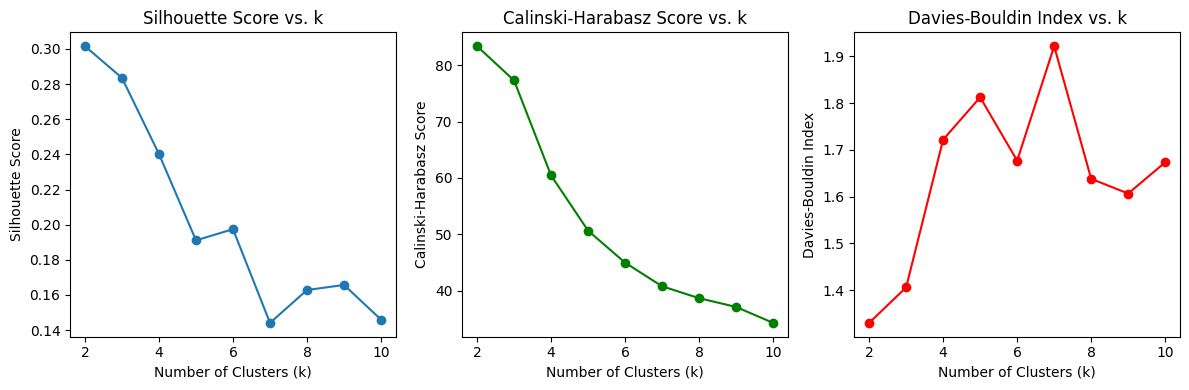

In [15]:
k_values = range(2, 11)
silhouette_scores = []
ch_scores = []
db_indices = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)

    silhouette_scores.append(silhouette_score(X_scaled, clusters))
    ch_scores.append(calinski_harabasz_score(X_scaled, clusters))
    db_indices.append(davies_bouldin_score(X_scaled, clusters))

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. k")

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o', linestyle='-', color='g')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Calinski-Harabasz Score")
plt.title("Calinski-Harabasz Score vs. k")

plt.subplot(1, 3, 3)
plt.plot(k_values, db_indices, marker='o', linestyle='-', color='r')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index vs. k")

plt.tight_layout()
plt.show()

**QUESTION 7.**

Using elbow plot, determine the optimal k value for k-means clustering. Use below code.


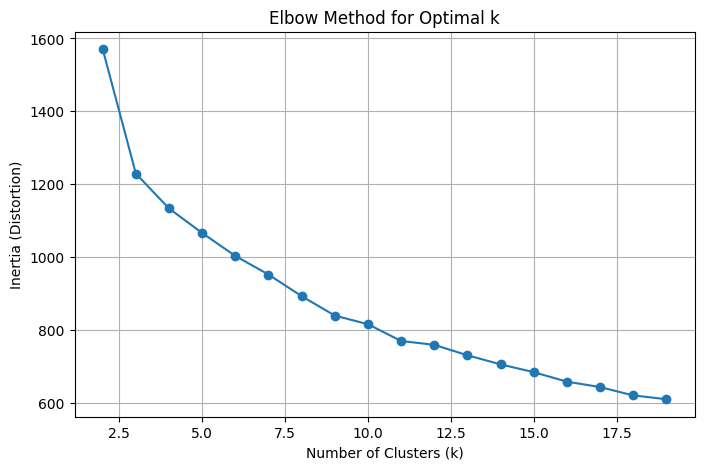

Here, k can be 3 or 4. 


In [17]:
distortions = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), distortions, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Distortion)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

print("Here, k can be 3 or 4. ")